# Import Statements

In [1]:
from __future__ import division
import xml.etree.ElementTree as ET
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import pytz
from collections import Counter

# Questions to Answer

1. How often have we messaged each other? Line graph?
2. Top five stickers
3. Word cloud
4. Who talks more, and when?
5. Chart a year ago typing back and forth versus now.
6. Month by month.
7. Day-of-week.
8. WHO LOVES EACH OTHER MORE.
9. Like, I'm going to parse cool data stats like which month we talked the most, what our conversations look like now versus the first month we met, what our frequency of conversation looks like in line charts, what a single conversation looks like between us, sentiment analysis over time, what days/times we both tend to talk most often.


back-up funzies: sentiment analysis #howgrossweare

# People who have helped/contributed

* Sebastian Barbiero
* Eowyn Winchester
* Nick Aldershof
* Aisling Nic Lynne
* ~ Samuel Taylor
* Joseph Iervolino

# Commented Out Text Code

In [2]:
# horse racing

In [3]:
#x = [2, 4, 6]
#y = [1, 3, 5]
#plt.plot(x, y)
#plt.show()

#file_lines = sms_file.readlines()
#ben_texts = [s for s in file_lines if 'contact_name="Ben Knight"' in s]

#https://medium.com/python-pandemonium/data-visualization-in-python-line-graph-in-matplotlib-9dfd0016d180

In [4]:
# text_file = open('sms.xml', 'r')
# texts = text_file.readlines()
# alex_texts = [s for s in texts if 'contact_name="Ben Knight"' in s]
# alex_texts

# Setting Up Facebook Data

In [5]:
# set local timezone
local_tz = pytz.timezone('America/New_York')

def utc_to_local(utc_dt):
    local_dt = utc_dt.replace(tzinfo=pytz.utc).astimezone(local_tz)
    return local_tz.normalize(local_dt)

In [6]:
file_name = 'BenKnight/message.json'

In [7]:
# pull in data
with open(file_name) as f: #
    data = json.load(f)

In [8]:
main_name = 'Cassie Beth'
other_name = 'Ben Knight'

# Facebook Data Manipulation

In [9]:
# parse data, create dataframe, sort by oldest message
messages = [x for x in data['messages']]
message_df = pd.DataFrame(messages)
message_df.sort('timestamp_ms', inplace=True)

#clean up content column
message_df['content'] = message_df['content'].str.lower()
message_df['content'].fillna(value='', inplace=True)

# convert unixtime to datetime and map to local timezone!
message_df['date'] = pd.to_datetime(message_df['timestamp_ms'], unit='ms')
message_df['date'] = map(utc_to_local, message_df['date'])

In [10]:
message_df['content_char_len'] = message_df['content'].str.len()
message_df['content_char_len'].fillna(value=0, inplace=True)

message_df['content_word_len'] = message_df['content'].str.split().str.len()
message_df['content_word_len'].fillna(value=0, inplace=True)

message_df['hearts'] = message_df['content'].str.contains('<3')
message_df['hearts'].fillna(value=False, inplace=True)

message_df['love'] = message_df['content'].str.contains('love')
message_df['love'].fillna(value=False, inplace=True)

In [11]:
len(message_df)

43127

In [12]:
message_df.describe()

,call_duration,timestamp_ms,content_char_len,content_word_len,hearts,love
count,18.000000,4.312700e+04,43127.000000,43127.000000,43127,43127
mean,154.277778,1.519087e+12,41.761333,8.263686,0.105711,0.03895472
std,338.948861,8.449878e+09,53.354136,10.179921,0.307471,0.1934893
min,0.000000,1.499391e+12,0.000000,0.000000,False,False
25%,0.000000,1.512484e+12,14.000000,3.000000,0,0
50%,0.000000,1.520123e+12,26.000000,5.000000,0,0
75%,1.500000,1.525672e+12,51.000000,10.000000,0,0
max,1180.000000,1.532991e+12,1618.000000,313.000000,True,True


In [13]:
# Texts from only this year (to keep out outliers)
pivot_date = utc_to_local(pd.to_datetime('2017-07-01'))
before_this_year = message_df[message_df['date'] < pivot_date]
this_year = message_df[message_df['date'] >= pivot_date]

# Get this year's texts for both of us
human1 = this_year[this_year['sender_name']==main_name].reset_index()
human2 = this_year[this_year['sender_name']==other_name].reset_index() #Ben Knight

# create a dictionary holding both
both_humans = {main_name:human1,other_name:human2}

# Top 5 Stats

In [14]:
def get_top_5(people, calc):
    top_5_dict = {}
    for x in people.keys():
        tbl = people[x]
        if calc == 'stickers':
            stickers_used = [str(st['uri']) for st in tbl[~pd.isnull(tbl['sticker'])]['sticker']]
            stickers_dict = {s:stickers_used.count(s) for s in set(stickers_used)}
            top_5 = sorted(stickers_dict, key=stickers_dict.get, reverse=True)[:5]
            top_5_dict[x] = {y:stickers_dict[y] for y in top_5}
        else:
            return 'That calc has not been implemented yet, try again!'
    return top_5_dict

# Overall Statistics

In [16]:
get_top_5(both_humans, 'stickers')

{'Ben Knight': {'messages/stickers_used/10333114_645899182157600_1344617070_n_645899178824267.png': 15,
  'messages/stickers_used/10574698_279478078913005_968156300_n_279478075579672.png': 7,
  'messages/stickers_used/10734314_1529175970665987_1687516910_n_1529175963999321.png': 6,
  'messages/stickers_used/851575_392309994199646_291720828_n_392309990866313.png': 11,
  'messages/stickers_used/851586_168401083316270_194796614_n_168401079982937.png': 38},
 'Cassie Beth': {'messages/stickers_used/47191684_1074621942699238_1803998749513482240_n_383649288463177.png': 8,
  'messages/stickers_used/851575_392309947532984_2142846104_n_392309944199651.png': 16,
  'messages/stickers_used/851575_392309987532980_414119311_n_392309984199647.png': 7,
  'messages/stickers_used/851575_392309994199646_291720828_n_392309990866313.png': 15,
  'messages/stickers_used/851586_392309974199648_212229493_n_392309967532982.png': 13}}

In [17]:
def how_many_times(tbl, word):
    x = tbl['content'].str.contains(word)
    x.fillna(value=False, inplace=True)
    return sum(x)

def determine_value(tbl, calc):
    if calc == 'messages':
        val = len(tbl)
    elif calc == 'word_count':
        val = sum(tbl['content_word_len'])
    elif calc == 'character_count':
        val = sum(tbl['content_char_len'])
    elif calc == 'stickers':
        val = sum(~pd.isnull(tbl['sticker']))
    elif calc == 'hearts':
        val = how_many_times(tbl, '<3')
    else:
        val = how_many_times(tbl, calc)
    return val

def calculate_totals(people, calc, do_round=True):
    answer_dict = {}
    for x in people.keys():
        tbl = people[x]
        answer_dict[x] = determine_value(tbl, calc)
    answer_dict['total'] = sum(answer_dict.values())
    
    for x in people.keys():
        percent_key = x+'_percent'
        percent_val = 100*answer_dict[x]/answer_dict['total']
        
        answer_dict[percent_key] = round(percent_val, 2) if do_round else percent_val
        
    return answer_dict

## Testing Individual Words

In [18]:
{x:calculate_totals(both_humans, x) for x in ['love', 'perfect', 'smol monster', 'small monster', 'cute', 'beautiful', 'hooman']}

{'beautiful': {'Ben Knight': 132,
  'Ben Knight_percent': 39.05,
  'Cassie Beth': 206,
  'Cassie Beth_percent': 60.95,
  'total': 338},
 'cute': {'Ben Knight': 173,
  'Ben Knight_percent': 31.8,
  'Cassie Beth': 371,
  'Cassie Beth_percent': 68.2,
  'total': 544},
 'hooman': {'Ben Knight': 7,
  'Ben Knight_percent': 13.73,
  'Cassie Beth': 44,
  'Cassie Beth_percent': 86.27,
  'total': 51},
 'love': {'Ben Knight': 729,
  'Ben Knight_percent': 43.39,
  'Cassie Beth': 951,
  'Cassie Beth_percent': 56.61,
  'total': 1680},
 'perfect': {'Ben Knight': 131,
  'Ben Knight_percent': 59.82,
  'Cassie Beth': 88,
  'Cassie Beth_percent': 40.18,
  'total': 219},
 'small monster': {'Ben Knight': 1,
  'Ben Knight_percent': 100.0,
  'Cassie Beth': 0,
  'Cassie Beth_percent': 0.0,
  'total': 1},
 'smol monster': {'Ben Knight': 15,
  'Ben Knight_percent': 83.33,
  'Cassie Beth': 3,
  'Cassie Beth_percent': 16.67,
  'total': 18}}

Goal: determine which words are used most often by both of us overall, more me than ben, and more ben than me.

In [19]:
with open ("stopwords.txt", "r") as myfile:
    stop_words=myfile.readlines()
    stop_words = map(str.strip, stop_words)

In [20]:
def find_most_used_words(people, num=10):
    answer_dict = {}
    for x in people.keys():
        tbl = people[x]
        top_words = Counter([w for w in " ".join(tbl['content'].str.lower()).split() if not w in stop_words]).most_common(num)
        answer_dict[x] = top_words
    answer_dict['combined'] = Counter([w for w in " ".join(message_df['content'].str.lower()).split() if not w in stop_words]).most_common(num)
    return answer_dict

In [21]:
how_many_times(human2, '')

14789

In [22]:
#if one word == 30 searches
#two word = 29 searches
#set of X words == searches(one word) - X

In [23]:
sample_set = human2['content']

In [24]:
sample_words = " ".join(sample_set.str.lower()).split()

In [25]:
human2_parsed = human2[human2['content'].apply(lambda x: 'ben sent a' not in x)]
convos = human2_parsed['content']
sample_words = " ".join(convos.str.lower()).split()
top_words = Counter([w for w in sample_words if not w in stop_words])#.most_common(num)
# zip(sample_words, sample_words[1:],sample_words[2:])

In [26]:
from itertools import dropwhile

In [27]:
min_num = 85

for key, count in dropwhile(lambda key_count: key_count[1] >= min_num, top_words.most_common()):
    del top_words[key]

In [28]:
top_words

Counter({u'100%': 85,
         u':-)': 323,
         u';-)': 136,
         u'<3': 1429,
         u'^_^': 219,
         u'allyson': 123,
         u'also': 397,
         u'always': 113,
         u'amazing': 126,
         u'appreciate': 105,
         u'back': 97,
         u'beautiful': 99,
         u'ben': 117,
         u'best': 111,
         u'better': 104,
         u'course': 94,
         u'cute': 113,
         u'day': 193,
         u'even': 116,
         u'feel': 149,
         u'fuck': 104,
         u'get': 300,
         u'give': 111,
         u'glad': 99,
         u'go': 144,
         u'god': 98,
         u'going': 224,
         u'good': 722,
         u'goodness': 87,
         u'got': 174,
         u'great': 96,
         u'haha': 99,
         u'happy': 123,
         u'hear': 97,
         u'hey': 132,
         u'holy': 94,
         u'hope': 213,
         u'just': 725,
         u'know': 366,
         u'last': 93,
         u'let': 110,
         u'like': 516,
         u'little': 147,
    

In [29]:
pd.DataFrame(top_words.values()).describe()

,0
count,106.000000
mean,201.603774
std,182.677529
min,85.000000
25%,104.000000
50%,134.000000
75%,223.750000
max,1429.000000


In [30]:
find_most_used_words(both_humans, 100)

{'Ben Knight': [(u'<3', 1429),
  (u'ben', 766),
  (u'just', 725),
  (u'good', 722),
  (u'sent', 676),
  (u'oh', 654),
  (u'lol', 645),
  (u'love', 570),
  (u'like', 516),
  (u'yes', 408),
  (u'also', 397),
  (u'know', 366),
  (u'thank', 358),
  (u'monster', 357),
  (u'really', 334),
  (u':-)', 323),
  (u'think', 321),
  (u'\xe2\x9d\xa4', 318),
  (u'much', 307),
  (u'get', 300),
  (u'will', 290),
  (u'one', 289),
  (u'time', 276),
  (u'see', 269),
  (u'well', 262),
  (u'photo.', 259),
  (u'now', 246),
  (u'morning', 242),
  (u'need', 234),
  (u'gif', 228),
  (u'going', 224),
  (u'omg', 223),
  (u'^_^', 219),
  (u'wait', 216),
  (u'hope', 213),
  (u'day', 193),
  (u'you.', 190),
  (u'may', 179),
  (u'things', 178),
  (u'make', 174),
  (u'got', 174),
  (u'want', 169),
  (u'right', 167),
  (u'work', 167),
  (u'please', 166),
  (u'way', 165),
  (u'sure', 161),
  (u'look', 158),
  (u'sticker.', 157),
  (u'maybe', 156),
  (u'sounds', 156),
  (u'ok', 149),
  (u'feel', 149),
  (u'little', 147),

I'm curious as to why the period in `you.` wasn't removed

# Gathering Statistics Together

In [31]:
def merge_two_dicts(x, y):
    z = x.copy()   # start with x's keys and values
    z.update(y)    # modifies z with y's keys and values & returns None
    return z

In [32]:
types_of_top_5 = ['stickers']
types_of_statistics = ['messages', 'word_count', 'character_count', 'stickers', 'hearts']

In [33]:
number_stats = {'total_'+x:calculate_totals(both_humans, x) for x in types_of_statistics}

In [34]:
top_stats = {'top_'+x:get_top_5(both_humans, x) for x in types_of_top_5}

In [35]:
statistics = merge_two_dicts(number_stats, top_stats)
statistics

{'top_stickers': {'Ben Knight': {'messages/stickers_used/10333114_645899182157600_1344617070_n_645899178824267.png': 15,
   'messages/stickers_used/10574698_279478078913005_968156300_n_279478075579672.png': 7,
   'messages/stickers_used/10734314_1529175970665987_1687516910_n_1529175963999321.png': 6,
   'messages/stickers_used/851575_392309994199646_291720828_n_392309990866313.png': 11,
   'messages/stickers_used/851586_168401083316270_194796614_n_168401079982937.png': 38},
  'Cassie Beth': {'messages/stickers_used/47191684_1074621942699238_1803998749513482240_n_383649288463177.png': 8,
   'messages/stickers_used/851575_392309947532984_2142846104_n_392309944199651.png': 16,
   'messages/stickers_used/851575_392309987532980_414119311_n_392309984199647.png': 7,
   'messages/stickers_used/851575_392309994199646_291720828_n_392309990866313.png': 15,
   'messages/stickers_used/851586_392309974199648_212229493_n_392309967532982.png': 13}},
 'total_character_count': {'Ben Knight': 585177,
  '

In [36]:
def print_word_stats(people, word, do_round=True):
    stat_dict = {'relative':{}, 'dependent':{}, 'count':{}}
    word_dict = calculate_totals(people, word)
    total_words = statistics['total_word_count']
    for x in people.keys():
        relative_stat = 100*word_dict[x]/total_words[x]
        val = round(relative_stat, 2) if do_round else relative_stat
        
        stat_dict['relative'][x] = val
        stat_dict['dependent'][x] = word_dict[x+'_percent']
        stat_dict['count'][x] = word_dict[x]
    
    
    return stat_dict

In [37]:
print_word_stats(both_humans, 'love')

{'count': {'Ben Knight': 729, 'Cassie Beth': 951},
 'dependent': {'Ben Knight': 43.39, 'Cassie Beth': 56.61},
 'relative': {'Ben Knight': 0.63, 'Cassie Beth': 0.39}}

In [70]:
statistics['total_word_count']['Ben Knight']

115591

In [76]:
statistics['total_word_count']['Cassie Beth']

240797

In [75]:
how_many_times(human2, 'love'), how_many_times(human1, 'love')

(729, 951)

In [71]:
# Percentage of 'love' in Ben's words
100*how_many_times(human2, 'love')/statistics['total_word_count']['Ben Knight']

0.63067193812667077

In [73]:
# Percentage of 'love' in Cassie's words
100*how_many_times(human1, 'love')/statistics['total_word_count']['Cassie Beth']

0.39493847514711561

# Date Range Checks

In [51]:
def subset_by_daterange(tbl, start_date, end_date):
    start_date = utc_to_local(pd.to_datetime(start_date))
    end_date = utc_to_local(pd.to_datetime(end_date))
    
    date_set_tbl = tbl[(tbl['date']>= start_date) & (tbl['date']<= end_date)].reset_index(drop=True)
    return date_set_tbl

In [39]:
def date_range_plot(people, start_date, end_date):
    for x in people.keys(): 
        tbl = people[x]
        date_set_tbl = subset_by_daterange(tbl, start_date, end_date)
        plt.plot(date_set_tbl['date'], range(len(date_set_tbl['date'])), 'o')
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 9
    plt.rcParams["figure.figsize"] = fig_size
    plt.show()

In [40]:
max(both_humans[main_name]['date'])

Timestamp('2018-07-30 18:50:50.470000-0400', tz='America/New_York')

In [41]:
start_date = utc_to_local(pd.to_datetime('2017-09-25'))
end_date = utc_to_local(pd.to_datetime('2017-10-02'))

In [42]:
message_df[(message_df['date']>=start_date) & (message_df['date']<=end_date)]

,audio_files,call_duration,content,gifs,missed,photos,reactions,sender_name,share,sticker,timestamp_ms,type,videos,date,content_char_len,content_word_len,hearts,love
40114,NaN,NaN,hi!,NaN,NaN,NaN,NaN,Ben Knight,NaN,NaN,1506297966455,Generic,NaN,2017-09-24 20:06:06.455000-04:00,3,1,False,False
40113,NaN,NaN,you sent a photo.,NaN,NaN,"[{u'creation_timestamp': 1506299199, u'uri': u...",NaN,Cassie Beth,NaN,NaN,1506299199777,Generic,NaN,2017-09-24 20:26:39.777000-04:00,17,4,False,False
40112,NaN,NaN,you sent a video.,NaN,NaN,NaN,NaN,Cassie Beth,NaN,NaN,1506299213774,Generic,"[{u'creation_timestamp': 1506299213, u'uri': u...",2017-09-24 20:26:53.774000-04:00,17,4,False,False
40111,NaN,NaN,puppo.,NaN,NaN,NaN,NaN,Cassie Beth,NaN,NaN,1506299223814,Generic,NaN,2017-09-24 20:27:03.814000-04:00,6,1,False,False
40110,NaN,NaN,best puppo awardâ¢,NaN,NaN,NaN,NaN,Cassie Beth,NaN,NaN,1506299234102,Generic,NaN,2017-09-24 20:27:14.102000-04:00,19,3,False,False
40109,NaN,NaN,"at 1.10. it's like, five seconds. ahhhh\nplz ...",NaN,NaN,NaN,NaN,Cassie Beth,{u'link': u'https://www.facebook.com/peopleare...,NaN,1506309764867,Share,NaN,2017-09-24 23:22:44.867000-04:00,54,10,False,False
40108,NaN,NaN,i just heard an amazing lyric in a song.,NaN,NaN,NaN,NaN,Cassie Beth,NaN,NaN,1506455920094,Generic,NaN,2017-09-26 15:58:40.094000-04:00,40,9,False,False
40107,NaN,NaN,and i think you'd like it.,NaN,NaN,NaN,NaN,Cassie Beth,NaN,NaN,1506455929278,Generic,NaN,2017-09-26 15:58:49.278000-04:00,26,6,False,False
40106,NaN,NaN,"""i don't think it's an accident that tears are...",NaN,NaN,NaN,NaN,Cassie Beth,NaN,NaN,1506455951048,Generic,NaN,2017-09-26 15:59:11.048000-04:00,130,24,False,False
40105,NaN,NaN,woah,NaN,NaN,NaN,NaN,Ben Knight,NaN,NaN,1506455976572,Generic,NaN,2017-09-26 15:59:36.572000-04:00,4,1,False,False


In [43]:
max(message_df['date'])

Timestamp('2018-07-30 18:50:50.470000-0400', tz='America/New_York')

In [46]:
how_many_times(human2, 'monster')

550

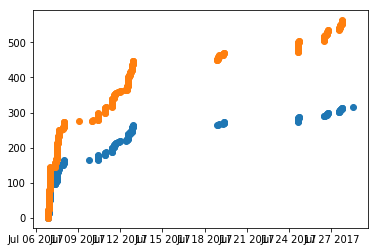

In [56]:
date_range_plot(both_humans, '2017-07-06', '2017-07-30')

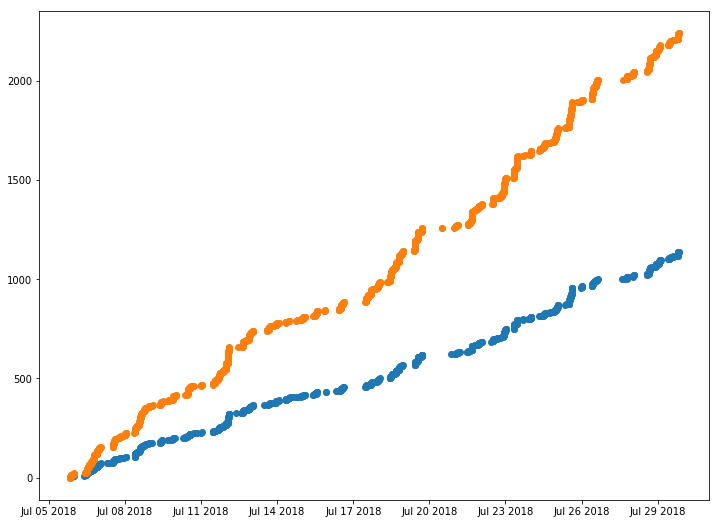

In [57]:
date_range_plot(both_humans, '2018-07-06', '2018-07-30')

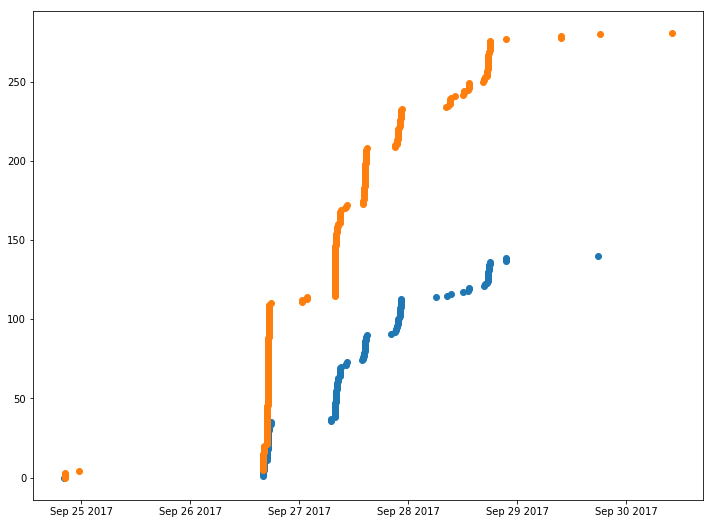

In [58]:
date_range_plot(both_humans, '2017-09-25', '2017-10-02')

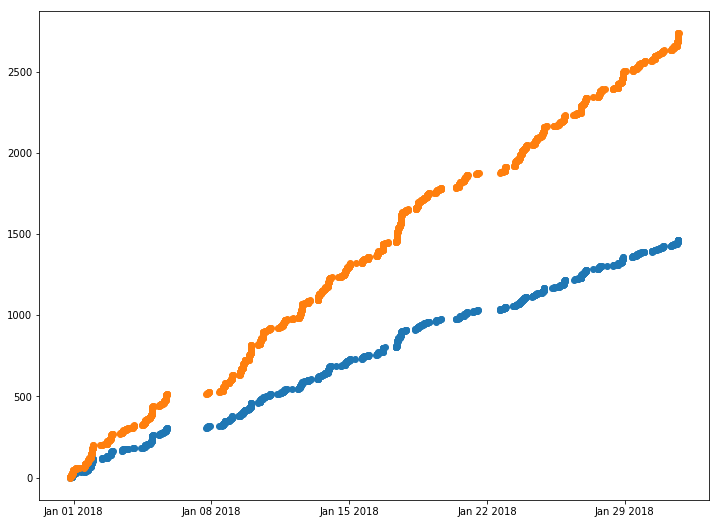

In [59]:
date_range_plot(both_humans, '2018-01-01', '2018-02-01')

In [60]:
x = subset_by_daterange(human1, '2017-07-01', '2017-08-01')
X = x['date']

In [62]:
message_subset = subset_by_daterange(message_df, '2018-01-01', '2018-02-01')
message_subset['diff'] = message_subset['date'].shift(-1) - message_subset['date']

In [63]:
def count_clusters(tbl, time_length):
    cluster_dict = {'time':time_length}
    
    try:
        time_td = pd.Timedelta(time_length)
    except:
        print('Write your time length in Timedelta format!')
        return
    
    diff_bool = message_subset['diff'] > time_length
    #return message_subset[diff_bool].index
    cluster_dict['num_clusters'] = sum(diff_bool)
    
    return cluster_dict 

In [64]:
[count_clusters(message_subset, x) for x in ['10min', '20min','30min', '60min', '120min', '240min', '360min','480min','600min','720min','840min','960min']]

[{'num_clusters': 533, 'time': '10min'},
 {'num_clusters': 362, 'time': '20min'},
 {'num_clusters': 273, 'time': '30min'},
 {'num_clusters': 143, 'time': '60min'},
 {'num_clusters': 63, 'time': '120min'},
 {'num_clusters': 34, 'time': '240min'},
 {'num_clusters': 28, 'time': '360min'},
 {'num_clusters': 16, 'time': '480min'},
 {'num_clusters': 5, 'time': '600min'},
 {'num_clusters': 3, 'time': '720min'},
 {'num_clusters': 3, 'time': '840min'},
 {'num_clusters': 3, 'time': '960min'}]

For each cluster, return:
* start time/date of cluster
* end time/date of cluster
* number of messages in cluster (combined and separate)
* likelihood _of_continuation (search for first word also, and?)


# Fun Data Testing 2018-01-30

In [65]:
how_many_times(human1, 'love you'), how_many_times(human1, 'i love you'), how_many_times(human1, 'loveyou'), how_many_times(human1, 'iloveyou')

(318, 298, 10, 7)

In [66]:
how_many_times(human2, 'love you'), how_many_times(human2, 'i love you'), how_many_times(human2, 'iloveyou') , how_many_times(human1, 'loveyou')

(265, 254, 11, 10)

I feel like I need to clean up the way I organize my functions. This is a really nice first stop in figuring out what the data looks like, but I don't like how messy everything is. 

I'd like to create a new notebook where I organize what I'd like to implement, what functions I need in order to do that, and what that looks like.

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)